In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [165]:
df = pd.read_csv("E:/games/IISc-May-2019/HAPT Data Set/FeatureSet/60feature_Dataset.csv",header=None)
# y = df.loc[:,200]    #for 200 features
# X = df.loc[:,0:199]  

# y = df.loc[:,100]    #for 100 features
# X = df.loc[:,0:99]


y = df.loc[:,60]      #for 60 features
X = df.loc[:,0:59]
# X.loc[:,:49] = X.loc[:,:49]*1e5        #Scaling 
# X.loc[:,100:149] = X.loc[:,100:149]*1e5    #Scaling
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
X = standard_scaler.fit_transform(X)





uci_X = pd.read_csv("E:/games/IISc-May-2019/HAPT Data Set/Train/X_train.csv")
uci_y = pd.read_csv("E:/games/IISc-May-2019/HAPT Data Set/Train/y_train.csv")
# uci_X = uci_X.sample(frac=1).reset_index(drop=True)
# uci_y = uci_y.sample(frac=1).reset_index(drop=True)
uci_X = uci_X.loc[0:5000,:]
uci_y = uci_y.loc[0:5000,:]






# One Hot Encoding of labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



label = LabelEncoder()
intval = label.fit_transform(y)
intval = intval.reshape(len(intval),1)
onehot = OneHotEncoder(sparse = False)

y = onehot.fit_transform(intval)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.96, shuffle=True) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5825, 200) (5825, 12)
(243, 200) (243, 12)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [161]:
model = Sequential()
model.add(Dense(32, activation = 'relu', kernel_initializer = 'RandomUniform', input_dim = 200, name = "layer-1"))
# model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', name = "layer-2"))
# model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform', name = "layer-3"))
model.add(Dense(12,activation = 'softmax', kernel_initializer = 'uniform', name="Output-layer"))
optimizer = Adam(lr = 0.001)
model.compile(  optimizer=optimizer ,
                 loss='categorical_crossentropy', #Not binary as it is a multiclass problem
                 metrics=['accuracy'])

In [162]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer-1 (Dense)              (None, 32)                6432      
_________________________________________________________________
Output-layer (Dense)         (None, 12)                396       
Total params: 6,828
Trainable params: 6,828
Non-trainable params: 0
_________________________________________________________________


          0         1         2         3         4         5         6   \
0   1.000000  0.905047  0.852541  0.816015  0.793414  0.779213  0.772652   
1   0.905047  1.000000  0.953374  0.912814  0.899282  0.874884  0.865742   
2   0.852541  0.953374  1.000000  0.970536  0.957875  0.936014  0.926624   
3   0.816015  0.912814  0.970536  1.000000  0.985141  0.968339  0.959849   
4   0.793414  0.899282  0.957875  0.985141  1.000000  0.984819  0.977373   
5   0.779213  0.874884  0.936014  0.968339  0.984819  1.000000  0.992249   
6   0.772652  0.865742  0.926624  0.959849  0.977373  0.992249  1.000000   
7   0.757984  0.853192  0.916191  0.952814  0.970478  0.985734  0.994032   
8   0.749480  0.843040  0.907003  0.947051  0.963999  0.978931  0.987390   
9   0.745431  0.836516  0.902248  0.942963  0.959105  0.974589  0.984363   
10  0.740900  0.836027  0.903306  0.941813  0.957855  0.973194  0.982566   
11  0.732811  0.828696  0.897485  0.935533  0.954005  0.970568  0.979910   
12  0.729221

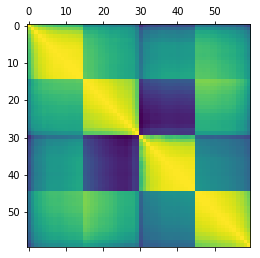

In [112]:
import matplotlib.pyplot as plt
dis = pd.DataFrame(X);
print(dis.corr())
plt.matshow(dis.corr())
plt.show()

In [163]:
model.fit(X_train,y_train, epochs = 100 )

Epoch 1/100
5825/5825 [==============================] - 1s 185us/step - loss: 5.5009 - acc: 0.3231
Epoch 2/100
5825/5825 [==============================] - 0s 43us/step - loss: 4.2218 - acc: 0.3478
Epoch 3/100
5825/5825 [==============================] - 0s 45us/step - loss: 2.7392 - acc: 0.4010
Epoch 4/100
5825/5825 [==============================] - 0s 49us/step - loss: 2.5679 - acc: 0.4328
Epoch 5/100
5825/5825 [==============================] - 0s 44us/step - loss: 2.3722 - acc: 0.4584
Epoch 6/100
5825/5825 [==============================] - 0s 46us/step - loss: 2.3740 - acc: 0.4397
Epoch 7/100
5825/5825 [==============================] - 0s 48us/step - loss: 2.6847 - acc: 0.4422
Epoch 8/100
5825/5825 [==============================] - 0s 66us/step - loss: 2.5579 - acc: 0.4647
Epoch 9/100
5825/5825 [==============================] - 0s 60us/step - loss: 2.5837 - acc: 0.4563
Epoch 10/100
5825/5825 [==============================] - 0s 66us/step - loss: 2.5831 - acc: 0.4534
Epoch 11

5825/5825 [==============================] - 0s 46us/step - loss: 2.1891 - acc: 0.5282
Epoch 84/100
5825/5825 [==============================] - 0s 43us/step - loss: 2.1855 - acc: 0.5264
Epoch 85/100
5825/5825 [==============================] - 0s 43us/step - loss: 2.1778 - acc: 0.5286
Epoch 86/100
5825/5825 [==============================] - 0s 48us/step - loss: 2.1617 - acc: 0.5308
Epoch 87/100
5825/5825 [==============================] - 0s 43us/step - loss: 2.1470 - acc: 0.5320
Epoch 88/100
5825/5825 [==============================] - 0s 43us/step - loss: 2.1726 - acc: 0.5305
Epoch 89/100
5825/5825 [==============================] - 0s 44us/step - loss: 2.1488 - acc: 0.5301
Epoch 90/100
5825/5825 [==============================] - 0s 47us/step - loss: 2.1504 - acc: 0.5330
Epoch 91/100
5825/5825 [==============================] - 0s 44us/step - loss: 2.1568 - acc: 0.5320
Epoch 92/100
5825/5825 [==============================] - 0s 43us/step - loss: 2.1451 - acc: 0.5339
Epoch 93/100


In [104]:
#     For Confusion Matrix

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test,1), np.argmax(y_pred,1))
cm


<bound method Model.fit of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001DF6D5F5080>>

In [101]:
model.evaluate(X_test, y_test)
# model.metrics_names

486/486 [==============================] - 0s 29us/step


[0.2104052200974751, 0.9351851842040387]

5582/5582 [==============================] - 0s 21us/step


[0.19867919124355884, 0.9378358870370975]